In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [237]:
df = pd.read_csv('customer_churn.csv',na_values= ' ')

In [238]:
df.shape

(7043, 21)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [240]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5336,9441-QHEVC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.10,19.10,No
561,7343-EOBEU,Male,0,Yes,No,3,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,23.60,89.05,No
6341,9330-IJWIO,Female,0,No,No,13,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.35,1358.85,Yes
5658,2371-JQHZZ,Male,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.00,2248.05,No
3045,9114-AAFQH,Female,0,Yes,No,48,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65,No


In [241]:
df.isnull().sum().sum()

11

In [242]:
df.dropna(inplace=True)

In [243]:
df.isnull().sum().sum()

0

In [244]:
df.duplicated().sum()

0

In [245]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [246]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [247]:
male  = df['gender']=='Male'
n_male = male.sum()
print(f'the number of male customers are: {n_male}')

the number of male customers are: 3549


In [248]:
dsl_cust = df[df['InternetService'] == 'DSL'].shape[0]
print(f'The number of \'DSL customers\' are {dsl_cust}')

The number of 'DSL customers' are 2416


In [249]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [250]:
new_customer = df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]

In [251]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [252]:
new_customer = df[(df['tenure']<10)|(df['TotalCharges'] <500)]

Text(0.5, 1.0, 'Customer Churn state')

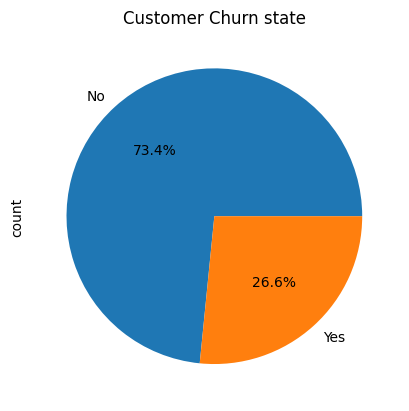

In [253]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Customer Churn state')


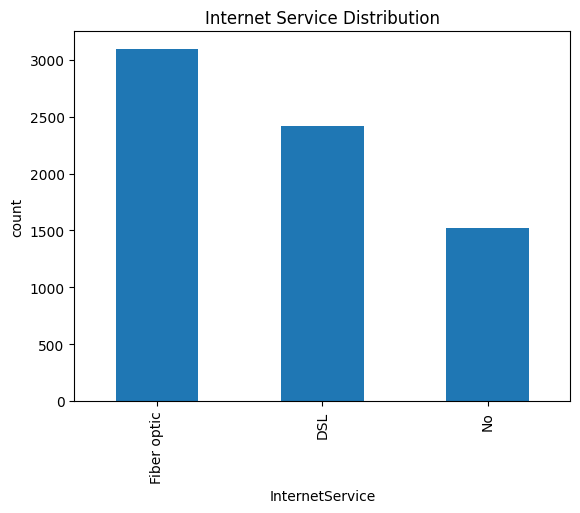

In [254]:
df['InternetService'].value_counts().plot.bar()
plt.title('Internet Service Distribution')
plt.ylabel('count');

In [255]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [256]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [257]:
x = df[['tenure']]
y = df[['Churn']]
x.shape, y.shape

((7032, 1), (7032, 1))

In [258]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [259]:
model = Sequential()
model.add(Dense(12, input_dim = 1, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

C:\Users\nages\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [260]:
model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5532 - loss: 0.9678 - val_accuracy: 0.7341 - val_loss: 0.5136
Epoch 2/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.5068 - val_accuracy: 0.7341 - val_loss: 0.5134
Epoch 3/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.5118 - val_accuracy: 0.7341 - val_loss: 0.5182
Epoch 4/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.5160 - val_accuracy: 0.7341 - val_loss: 0.5138
Epoch 5/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 0.5152 - val_accuracy: 0.7341 - val_loss: 0.5138
Epoch 6/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.5016 - val_accuracy: 0.7341 - val_loss: 0.5134
Epoch 7/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5084 - val_accuracy: 0.7578 - val_loss: 0.5134
Epoch 8/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7511 - loss: 0.5058 - val_accu

In [261]:
np.mean(model.history.history['val_accuracy']),np.mean(model.history.history['accuracy'])

(0.7558388463656107, 0.7515386648972829)

### here we get the mean model validation accuracy as 75.584%
### here we get the mean model accuracy as 75.154%

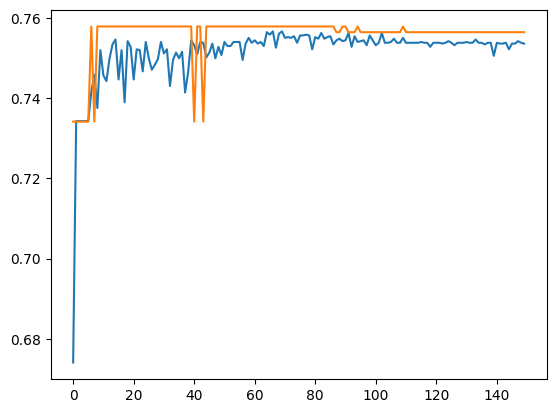

In [262]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

In [263]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [264]:
from sklearn.metrics import confusion_matrix

In [265]:
confusion_matrix(y_test,y_pred)

array([[1410,  139],
       [ 375,  186]], dtype=int64)

In [266]:
model_2 = Sequential()
model_2.add(Dense(12, input_dim = 1, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

C:\Users\nages\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [267]:
model_2.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6130 - loss: 1.4110 - val_accuracy: 0.7341 - val_loss: 0.5432
Epoch 2/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6482 - loss: 0.7690 - val_accuracy: 0.7341 - val_loss: 0.5160
Epoch 3/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.6721 - val_accuracy: 0.7341 - val_loss: 0.5177
Epoch 4/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5903 - val_accuracy: 0.7341 - val_loss: 0.5185
Epoch 5/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7253 - loss: 0.5526 - val_accuracy: 0.7341 - val_loss: 0.5233
Epoch 6/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7270 - loss: 0.5390 - val_accuracy: 0.7341 - val_loss: 0.5284
Epoch 7/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7268 - loss: 0.5451 - val_accuracy: 0.7341 - val_loss: 0.5256
Epoch 8/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7327 - loss: 0.5275 - val_accu

In [268]:
np.mean(model_2.history.history['val_accuracy']), np.mean(model_2.history.history['accuracy'])

(0.7341232299804688, 0.7320804492632548)

### here we get the mean model validation accuracy as 73.412%
### here we get the mean model accuracy as 72.208%

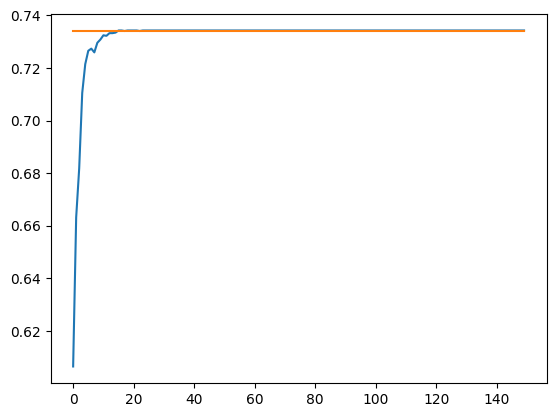

In [269]:
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_2.history.history['val_accuracy'])

plt.show()

In [270]:
y_pred_probs = model_2.predict(x_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [271]:
confusion_matrix(y_test, y_pred)

array([[1549,    0],
       [ 561,    0]], dtype=int64)

In [272]:
model_2.history.history

{}

In [273]:
x = df[['tenure','MonthlyCharges', 'TotalCharges']]
y = df[['Churn']]
x.shape,y.shape

((7032, 3), (7032, 1))

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3,random_state=42)

In [275]:
model_3 = Sequential()

In [276]:
model_3.add(Dense(12, input_dim = 3, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

C:\Users\nages\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [277]:
model_3.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3465 - loss: 180.8890 - val_accuracy: 0.7365 - val_loss: 6.6316
Epoch 2/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7466 - loss: 2.3206 - val_accuracy: 0.7853 - val_loss: 0.7125
Epoch 3/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7631 - loss: 0.6929 - val_accuracy: 0.7845 - val_loss: 0.6896
Epoch 4/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7780 - loss: 0.5880 - val_accuracy: 0.7833 - val_loss: 0.6020
Epoch 5/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7671 - loss: 0.6381 - val_accuracy: 0.7827 - val_loss: 0.6839
Epoch 6/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7501 - loss: 0.9399 - val_accuracy: 0.7688 - val_loss: 0.7233
Epoch 7/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7433 - loss: 1.0392 - val_accuracy: 0.7684 - val_loss: 0.7259
Epoch 8/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7533 - loss: 0.7990 - val_accuracy: 0.7658

In [278]:
np.mean(model_3.history.history['accuracy']),np.mean( model_3.history.history['val_accuracy'])


(0.7521574223041534, 0.7383695606390636)

### here we get the mean model validation accuracy as 75.215%
### here we get the mean model accuracy as 73.837%

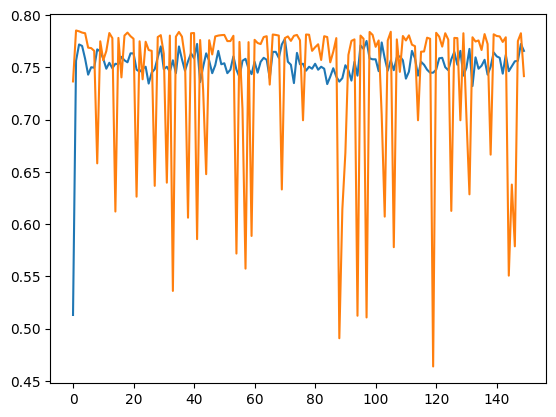

In [279]:
plt.plot(model_3.history.history['accuracy'])
plt.plot(model_3.history.history['val_accuracy'])
plt.show()

In [280]:
y_pred_probs = model_3.predict(x_test)
y_pred = (y_pred_probs >=0.5).astype(int)

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [281]:
confusion_matrix(y_test,y_pred)

array([[2871,  755],
       [ 517,  780]], dtype=int64)

### The first model gave us a mean validation accuracy of 75.584%, 
### the second model had accuracy of 73.412% ,
### the third model had a mean validation accuracy of 75.215%.
The second model gave us the least accuracy because we added two dropout layers with high
probabilities of dropout.